In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import boxcox
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv(r"G:\Velocity Aug 22\PROJECTS FOR FRESHER PROFILE\Water_Potability\water_potability.csv")

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Train Test Split

In [5]:
x = df.drop("Potability",axis= 1)
y = df["Potability"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [7]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1168,5.473603,218.513145,14608.363145,5.621362,NaN,472.796835,10.583581,73.106007,4.957822
3175,7.027297,185.838671,31151.615179,7.625545,327.221734,398.705017,19.461464,80.693568,3.392666
2617,7.509350,192.467955,17045.600095,8.815845,346.741822,266.357744,15.930051,83.262529,4.321856
2648,4.126581,113.024472,40528.805353,6.489951,NaN,392.109146,15.793392,68.797443,3.504751
622,4.029053,203.386857,42327.168016,8.550483,279.675256,503.732428,13.758836,46.384064,4.179656


In [8]:
x_test.loc[1]

ph                     3.716080
Hardness             129.422921
Solids             18630.057858
Chloramines            6.635246
Sulfate                     NaN
Conductivity         592.885359
Organic_carbon        15.180013
Trihalomethanes       56.329076
Turbidity              4.500656
Name: 1, dtype: float64

## EDA

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 1168 to 3233
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2223 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1989 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2493 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


In [10]:
x_train.shape

(2620, 9)

In [11]:
x_train["Sulfate"].isna().mean()*100

24.083969465648856

In [12]:
x_train["ph"].isna().mean()*100

15.152671755725192

In [13]:
x_train.isna().mean()*100

ph                 15.152672
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            24.083969
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.847328
Turbidity           0.000000
dtype: float64

In [14]:
x_test.isna().mean()*100

ph                 14.329268
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            22.865854
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     5.335366
Turbidity           0.000000
dtype: float64

In [15]:
x_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2223.000000,2620.000000,2620.000000,2620.000000,1989.000000,2620.000000,2620.000000,2493.000000,2620.000000
mean,7.077748,196.159435,22006.378657,7.126331,334.025813,426.326042,14.331416,66.336109,3.965132
std,1.593406,33.162091,8758.796391,1.565385,41.353974,81.309848,3.314200,16.097544,0.788507
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,4.371899,8.175876,1.450000
25%,6.072434,176.331233,15732.309141,6.162264,307.954902,364.512390,12.120397,56.044934,3.437334
50%,7.031684,196.442155,20921.203012,7.142639,333.319882,422.353759,14.252791,66.728402,3.948659
75%,8.047456,216.657847,27339.015540,8.107380,360.086657,482.607998,16.615199,77.322330,4.509173
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


<AxesSubplot:xlabel='Potability', ylabel='count'>

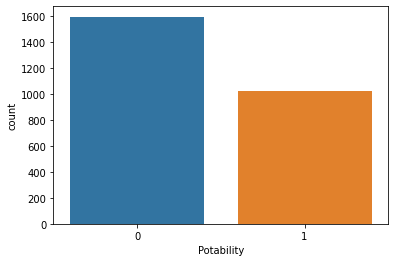

In [16]:
sns.countplot(x = y_train)

In [17]:
# std = StandardScaler()
# array = std.fit_transform(x_train)
# x_train = pd.DataFrame(array,columns=x_train.columns)

In [18]:
# array2 = std.transform(x_test)
# x_test = pd.DataFrame(array2,columns=x_test.columns)

In [19]:
Normal = MinMaxScaler()
array = Normal.fit_transform(x_train)
x_train = pd.DataFrame(array,columns=x_train.columns)

In [20]:
array2 = Normal.transform(x_test)
x_test = pd.DataFrame(array2,columns=x_test.columns)

In [21]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.477254,0.693094,0.423787,0.465946,0.511992,0.252759,0.157402,0.327319,0.284883
1,0.438553,0.438940,0.387041,0.715662,0.536959,0.546718,0.616184,0.449724,0.452112
2,0.588792,0.606115,0.478442,0.623337,NaN,0.582322,0.498571,0.707107,0.397186
3,0.561792,0.589815,0.229692,0.490090,NaN,0.387992,0.355542,0.569475,0.632450
4,0.511238,0.604218,0.384158,0.279637,0.610073,0.569049,0.462809,NaN,0.705922
...,...,...,...,...,...,...,...,...,...
651,0.509816,0.591496,0.282166,0.544261,0.490418,0.214661,0.363761,0.483967,0.286289
652,0.555332,0.534299,0.221800,0.411047,NaN,0.245553,0.605942,NaN,0.465460
653,0.576663,0.523713,0.275596,0.590742,0.580852,0.439645,0.374601,0.397503,0.643659
654,0.559535,0.629418,0.460019,0.705976,0.531983,0.490783,0.458085,0.421826,0.781023


In [22]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.390972,0.620552,0.234581,0.412474,NaN,0.509414,0.259598,0.560592,0.663230
1,0.501950,0.502034,0.506199,0.569358,0.563081,0.379851,0.630621,0.626102,0.367303
2,0.536382,0.526080,0.274597,0.662532,0.618531,0.148418,0.483037,0.648282,0.542987
3,0.294756,0.237919,0.660160,0.480466,NaN,0.368317,0.477326,0.523393,0.388495
4,0.287789,0.565685,0.689687,0.641760,0.428017,0.563511,0.392298,0.329881,0.516101
...,...,...,...,...,...,...,...,...,...
2615,0.586460,0.434072,0.223493,0.788324,0.325216,0.366498,0.391805,0.456574,0.666677
2616,0.501095,0.633609,0.263196,0.586057,0.636847,0.417329,0.186752,0.503937,0.718704
2617,NaN,0.529461,0.497647,0.510495,0.605610,0.435268,0.546425,0.360096,0.276621
2618,NaN,0.488523,0.346966,0.494347,NaN,0.368884,0.463584,0.447836,0.678014


In [23]:
imputer = KNNImputer()
array = imputer.fit_transform(x_train)
x_train = pd.DataFrame(array,columns=x_train.columns)

In [24]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.390972,0.620552,0.234581,0.412474,0.648887,0.509414,0.259598,0.560592,0.663230
1,0.501950,0.502034,0.506199,0.569358,0.563081,0.379851,0.630621,0.626102,0.367303
2,0.536382,0.526080,0.274597,0.662532,0.618531,0.148418,0.483037,0.648282,0.542987
3,0.294756,0.237919,0.660160,0.480466,0.691527,0.368317,0.477326,0.523393,0.388495
4,0.287789,0.565685,0.689687,0.641760,0.428017,0.563511,0.392298,0.329881,0.516101
...,...,...,...,...,...,...,...,...,...
2615,0.586460,0.434072,0.223493,0.788324,0.325216,0.366498,0.391805,0.456574,0.666677
2616,0.501095,0.633609,0.263196,0.586057,0.636847,0.417329,0.186752,0.503937,0.718704
2617,0.494525,0.529461,0.497647,0.510495,0.605610,0.435268,0.546425,0.360096,0.276621
2618,0.524713,0.488523,0.346966,0.494347,0.564288,0.368884,0.463584,0.447836,0.678014


In [25]:
x_train.isna().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
dtype: float64

In [26]:
array2 = imputer.transform(x_test)
x_test = pd.DataFrame(array2,columns=x_test.columns)

In [27]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.477254,0.693094,0.423787,0.465946,0.511992,0.252759,0.157402,0.327319,0.284883
1,0.438553,0.438940,0.387041,0.715662,0.536959,0.546718,0.616184,0.449724,0.452112
2,0.588792,0.606115,0.478442,0.623337,0.594752,0.582322,0.498571,0.707107,0.397186
3,0.561792,0.589815,0.229692,0.490090,0.571263,0.387992,0.355542,0.569475,0.632450
4,0.511238,0.604218,0.384158,0.279637,0.610073,0.569049,0.462809,0.471300,0.705922
...,...,...,...,...,...,...,...,...,...
651,0.509816,0.591496,0.282166,0.544261,0.490418,0.214661,0.363761,0.483967,0.286289
652,0.555332,0.534299,0.221800,0.411047,0.682954,0.245553,0.605942,0.525622,0.465460
653,0.576663,0.523713,0.275596,0.590742,0.580852,0.439645,0.374601,0.397503,0.643659
654,0.559535,0.629418,0.460019,0.705976,0.531983,0.490783,0.458085,0.421826,0.781023


In [28]:
x_test.isna().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
dtype: float64

Column_Name : ph


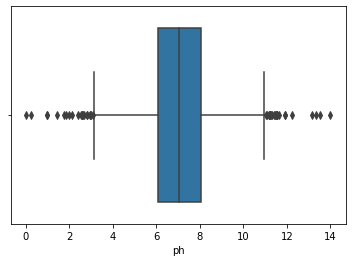

********************************************************************************


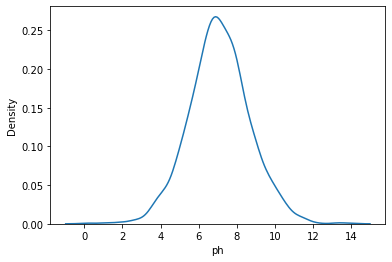

********************************************************************************
Skewness :  0.025630447632210205
################################################################################
Column_Name : Hardness


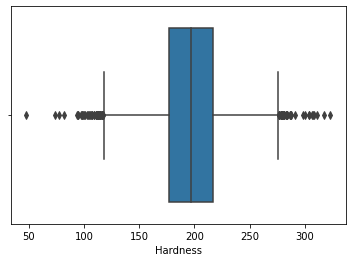

********************************************************************************


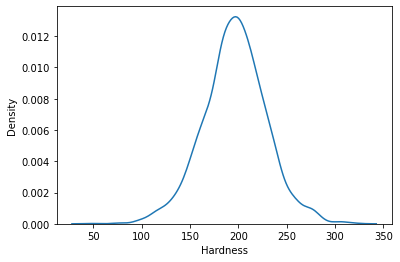

********************************************************************************
Skewness :  -0.0393417047767249
################################################################################
Column_Name : Solids


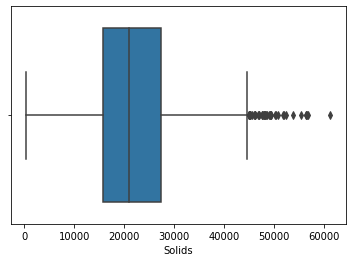

********************************************************************************


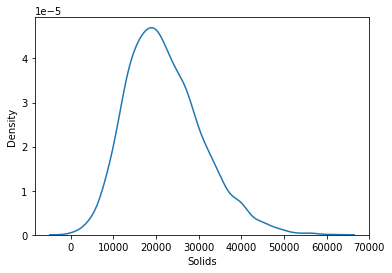

********************************************************************************
Skewness :  0.6216344855169127
################################################################################
Column_Name : Chloramines


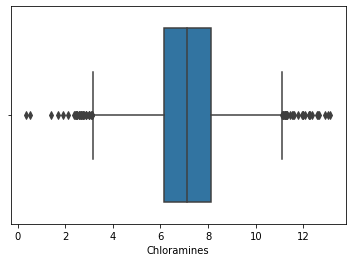

********************************************************************************


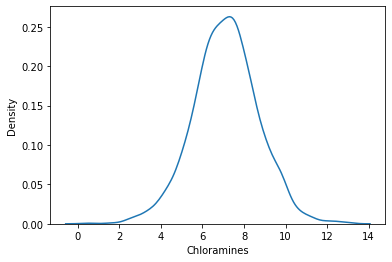

********************************************************************************
Skewness :  -0.01209844012438221
################################################################################
Column_Name : Sulfate


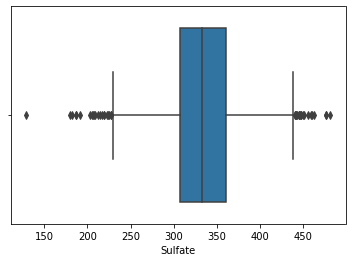

********************************************************************************


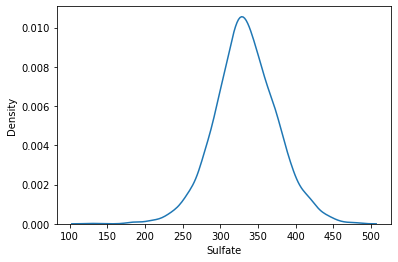

********************************************************************************
Skewness :  -0.03594662160706187
################################################################################
Column_Name : Conductivity


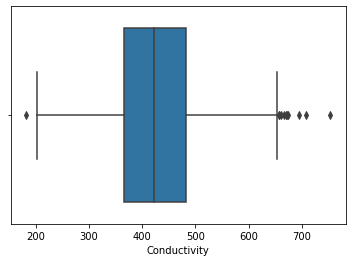

********************************************************************************


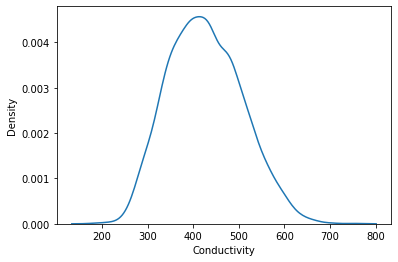

********************************************************************************
Skewness :  0.2644902239264119
################################################################################
Column_Name : Organic_carbon


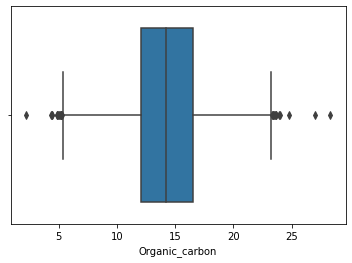

********************************************************************************


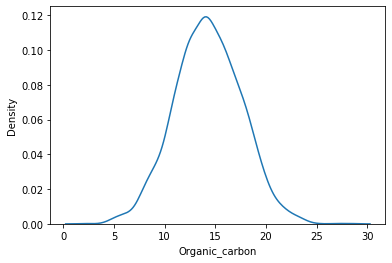

********************************************************************************
Skewness :  0.025532582090242492
################################################################################
Column_Name : Trihalomethanes


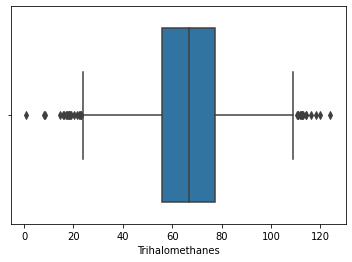

********************************************************************************


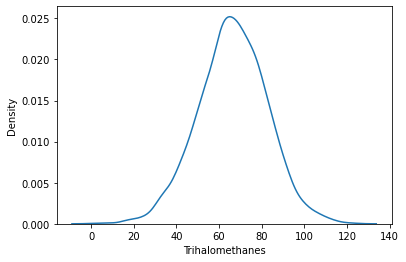

********************************************************************************
Skewness :  -0.08303067407901553
################################################################################
Column_Name : Turbidity


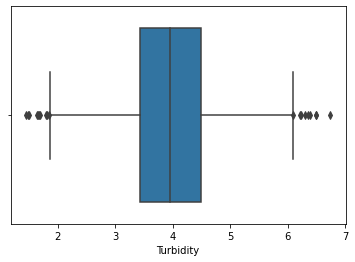

********************************************************************************


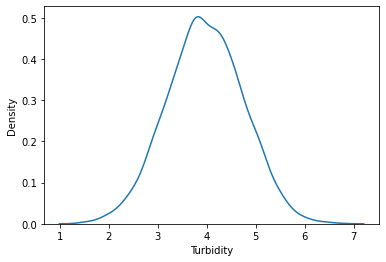

********************************************************************************
Skewness :  -0.007816642377392604
################################################################################


In [29]:
for i in x_train.columns:
    print(f"Column_Name : {i}")
    sns.boxplot(x = df[f"{i}"] )
    plt.show()
    print("*"*80)
    sns.kdeplot(x = df[f"{i}"])
    plt.show()
    print("*"*80)
    print("Skewness : ",df[f"{i}"].skew())
    print("#"*80)   

In [30]:
x_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [31]:
col1 = ['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

## IQR METHOD  >> SOLIDS

In [32]:
q1 = x_train["Solids"].quantile(0.25)
q3 = x_train["Solids"].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)
x_train["Solids"]=np.where(x_train["Solids"]>upper_tail,upper_tail,x_train["Solids"])

<AxesSubplot:xlabel='Solids'>

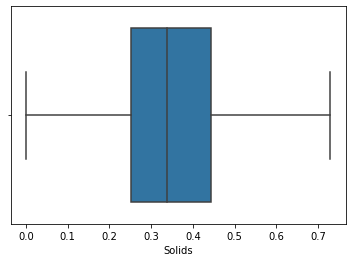

In [33]:
sns.boxplot(x = x_train["Solids"])

<AxesSubplot:>

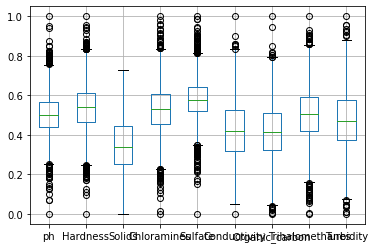

In [34]:
x_train.boxplot()

In [35]:
q1 = x_test["Solids"].quantile(0.25)
q3 = x_test["Solids"].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)
x_test["Solids"]=np.where(x_test["Solids"]>upper_tail,upper_tail,x_test["Solids"])

<AxesSubplot:>

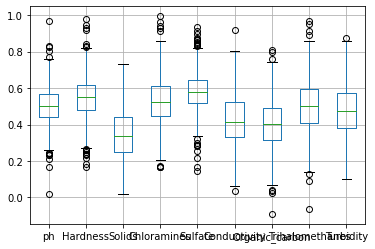

In [36]:
x_test.boxplot()

<AxesSubplot:xlabel='Potability', ylabel='count'>

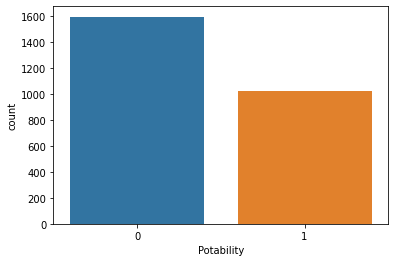

In [37]:
sns.countplot(x = y_train)

<AxesSubplot:xlabel='Potability', ylabel='count'>

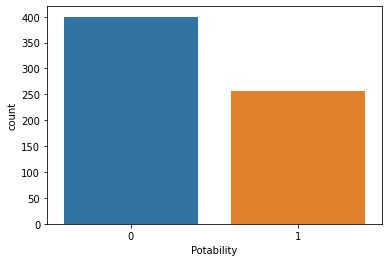

In [38]:
sns.countplot(x = y_test)

In [39]:
y_train.value_counts()

0    1598
1    1022
Name: Potability, dtype: int64

In [40]:
y_test.value_counts()

0    400
1    256
Name: Potability, dtype: int64

## Oversampling

In [41]:
over_sampler = RandomOverSampler(sampling_strategy=1)
x_train_samples, y_train_samples = over_sampler.fit_resample(x_train, y_train)
y_train_samples.value_counts()

1    1598
0    1598
Name: Potability, dtype: int64

In [42]:
over_samples = RandomOverSampler(sampling_strategy=1)
x_test_samples, y_test_samples = over_samples.fit_resample(x_test, y_test)
y_test_samples.value_counts()

0    400
1    400
Name: Potability, dtype: int64

In [43]:
y_train_samples

0       1
1       1
2       0
3       0
4       0
       ..
3191    1
3192    1
3193    1
3194    1
3195    1
Name: Potability, Length: 3196, dtype: int64

In [44]:
y_test_samples

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Potability, Length: 800, dtype: int64

In [45]:
x_test_samples

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.477254,0.693094,0.423787,0.465946,0.511992,0.252759,0.157402,0.327319,0.284883
1,0.438553,0.438940,0.387041,0.715662,0.536959,0.546718,0.616184,0.449724,0.452112
2,0.588792,0.606115,0.478442,0.623337,0.594752,0.582322,0.498571,0.707107,0.397186
3,0.561792,0.589815,0.229692,0.490090,0.571263,0.387992,0.355542,0.569475,0.632450
4,0.511238,0.604218,0.384158,0.279637,0.610073,0.569049,0.462809,0.471300,0.705922
...,...,...,...,...,...,...,...,...,...
795,0.581265,0.476200,0.549464,0.684923,0.594296,0.523888,0.330209,0.757436,0.244634
796,0.483974,0.387899,0.249637,0.448699,0.607993,0.728319,0.532706,0.413974,0.296378
797,0.472055,0.638684,0.325311,0.596926,0.653993,0.517363,0.274237,0.353723,0.541595
798,0.476000,0.551908,0.255836,0.384015,0.618084,0.290053,0.485518,0.457424,0.147046


## Model Instantiation

### 1.Logistic Regression

In [46]:
log_reg  = LogisticRegression()

In [47]:
log_reg.fit(x_train_samples,y_train_samples)

LogisticRegression()

### Train Evaluation After Over-Sampling

In [48]:
y_pred_train = log_reg.predict(x_train_samples)

In [49]:
acc = accuracy_score(y_train_samples,y_pred_train)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_train_samples,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train_samples,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.5247183979974969
Confusion Matrix :
 [[851 747]
 [772 826]]
Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.53      0.53      1598
           1       0.53      0.52      0.52      1598

    accuracy                           0.52      3196
   macro avg       0.52      0.52      0.52      3196
weighted avg       0.52      0.52      0.52      3196



### Test Evaluation After Over-Sampling

In [50]:
y_pred_test = log_reg.predict(x_test_samples)

In [51]:
acc = accuracy_score(y_test_samples,y_pred_test)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_test_samples,y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test_samples,y_pred_test)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.53375
Confusion Matrix :
 [[209 191]
 [182 218]]
Classification Report :
               precision    recall  f1-score   support

           0       0.53      0.52      0.53       400
           1       0.53      0.55      0.54       400

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



In [52]:
x_test_samples.loc[8:9]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
8,0.491784,0.330108,0.239257,0.730680,0.540109,0.184377,0.410068,0.400462,0.592611
9,0.759494,0.547517,0.207496,0.530998,0.550018,0.595504,0.516142,0.549110,0.429657


In [53]:
y_pred_test[0:100]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
np.where(y_pred_test==0)

(array([  2,   3,   4,   5,   6,   7,   9,  14,  15,  16,  17,  18,  19,
         21,  23,  24,  25,  30,  32,  33,  34,  38,  41,  42,  43,  44,
         45,  46,  48,  51,  52,  53,  55,  58,  60,  63,  64,  66,  70,
         71,  73,  75,  76,  77,  80,  81,  82,  83,  84,  85,  87,  88,
         89,  90,  91,  92, 100, 104, 105, 106, 107, 111, 112, 115, 116,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 136, 138, 142,
        143, 145, 146, 148, 150, 151, 153, 156, 159, 160, 162, 163, 164,
        167, 168, 169, 170, 171, 172, 173, 175, 179, 181, 183, 188, 189,
        194, 196, 198, 199, 203, 205, 208, 209, 210, 213, 215, 216, 217,
        218, 219, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 236,
        238, 239, 243, 247, 248, 252, 254, 257, 261, 262, 263, 268, 269,
        273, 276, 278, 279, 280, 283, 285, 286, 287, 288, 290, 293, 296,
        297, 300, 301, 302, 304, 306, 307, 308, 309, 312, 315, 316, 321,
        323, 324, 327, 328, 329, 330, 332, 333, 334

In [55]:
np.where(y_test_samples==0)

(array([  0,   1,   2,   3,   4,   5,   7,   9,  10,  11,  13,  17,  19,
         21,  23,  24,  26,  28,  29,  30,  33,  34,  35,  36,  38,  39,
         40,  42,  43,  44,  45,  46,  47,  51,  52,  55,  56,  57,  58,
         59,  63,  64,  66,  72,  75,  76,  77,  78,  79,  80,  81,  84,
         85,  86,  87,  88,  90,  95,  96,  97,  98,  99, 100, 102, 104,
        105, 106, 107, 110, 111, 112, 113, 114, 117, 119, 120, 121, 123,
        124, 125, 126, 127, 128, 129, 131, 132, 137, 138, 140, 141, 144,
        146, 147, 148, 149, 150, 153, 154, 155, 156, 157, 159, 162, 163,
        164, 165, 167, 169, 170, 172, 173, 176, 177, 180, 184, 189, 190,
        191, 192, 193, 194, 196, 198, 199, 201, 202, 205, 209, 210, 211,
        212, 213, 215, 216, 217, 218, 220, 222, 223, 224, 226, 228, 229,
        230, 231, 232, 234, 235, 236, 237, 239, 240, 243, 244, 245, 246,
        249, 251, 252, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265,
        267, 268, 269, 271, 272, 273, 274, 275, 277

In [56]:
log_reg1  = LogisticRegression()
log_reg1.fit(x_train,y_train)

LogisticRegression()

### Train Evaluation Before Over-Sampling

In [57]:
y_pred_train1 = log_reg1.predict(x_train)

In [58]:
acc = accuracy_score(y_train,y_pred_train1)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_train,y_pred_train1)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train1)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.6099236641221374
Confusion Matrix :
 [[1598    0]
 [1022    0]]
Classification Report :
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1598
           1       0.00      0.00      0.00      1022

    accuracy                           0.61      2620
   macro avg       0.30      0.50      0.38      2620
weighted avg       0.37      0.61      0.46      2620



C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Test Evaluation Before Over-Sampling

In [59]:
y_pred_test1 = log_reg1.predict(x_test)

In [60]:
acc = accuracy_score(y_test,y_pred_test1)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_test,y_pred_test1)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test1)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.6097560975609756
Confusion Matrix :
 [[400   0]
 [256   0]]
Classification Report :
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### 2.Ridge Regression

In [61]:
ridge_clf = RidgeClassifier(alpha = 100)

In [62]:
ridge_clf.fit(x_train_samples,y_train_samples)

RidgeClassifier(alpha=100)

### Train Evaluation

In [63]:
y_pred_train_ridge = ridge_clf.predict(x_train_samples)

In [64]:
acc = accuracy_score(y_train_samples,y_pred_train_ridge)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_train_samples,y_pred_train_ridge)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train_samples,y_pred_train_ridge)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.5184605757196495
Confusion Matrix :
 [[834 764]
 [775 823]]
Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      1598
           1       0.52      0.52      0.52      1598

    accuracy                           0.52      3196
   macro avg       0.52      0.52      0.52      3196
weighted avg       0.52      0.52      0.52      3196



### Test Evaluation

In [65]:
y_pred_test_ridge = ridge_clf.predict(x_test_samples)

In [66]:
acc = accuracy_score(y_test_samples,y_pred_test_ridge)
print("Accuracy Score :",acc)

cnf_matrix = confusion_matrix(y_test_samples,y_pred_test_ridge)
print("Confusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test_samples,y_pred_test_ridge)
print("Classification Report :\n",clf_report)

Accuracy Score : 0.52125
Confusion Matrix :
 [[206 194]
 [189 211]]
Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.52      0.52       400
           1       0.52      0.53      0.52       400

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800



In [67]:
ph              =   0.491784
Hardness         =  0.330108
Solids            = 0.239257
Chloramines        =0.730680
Sulfate            =0.540109
Conductivity       =0.184377
Organic_carbon     =0.410068
Trihalomethanes    =0.400462
Turbidity          =0.592611

In [68]:
ph                  =   3.716080
Hardness            = 129.422921
Solids             =18630.057858
Chloramines         =   6.635246
Sulfate              =       1000
Conductivity         =592.885359
Organic_carbon        =15.180013
Trihalomethanes       =56.329076
Turbidity              =4.500656

In [69]:
a = np.array([ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity])

In [70]:
test_array = Normal.transform([a])
#DF1 = pd.DataFrame(test_array,columns=x_test.columns)

C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [71]:
test_array

array([[0.26543429, 0.29740044, 0.30061142, 0.49183922, 2.47421643,
        0.71941108, 0.45169127, 0.41574413, 0.57679259]])

In [72]:
prediction = log_reg.predict(test_array)
prediction[0]

C:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [73]:
import pickle

In [74]:
with open("normalization.pkl","wb") as f:
    pickle.dump(Normal,f)

In [75]:
with open("Logistic_model.pkl","wb") as f:
    pickle.dump(log_reg,f)